<a href="https://colab.research.google.com/github/jscienciadados/visualizacao-pandas/blob/main/visualizacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ciência de Dados - Visualização com Pandas e Python

In [1]:
import pandas as pd
import numpy as np


In [2]:
clima = pd.read_csv('https://github.com/paulosalvatore/Ocean_Python_VisualizacaoDados_11_08_20/raw/master/MaterialApoio/clima.csv')
# renomeando uma coluna
clima = clima.rename(columns={' vento_rajada': 'vento_rajada'})

In [4]:
clima.head()

,codigo_estacao,data,hora,temp_inst,temp_max,temp_min,umid_inst,umid_max,umid_min,pto_orvalho_inst,pto_orvalho_max,pto_orvalho_min,pressao,pressao_max,pressao_min,vento_vel,vento_direcao,vento_rajada,radiacao,precipitacao
0,A101,05/03/2020,0,28.6,30.6,28.5,71,72,60,22.9,23.0,22.0,1004.9,1004.9,1003.6,1.4,52,6.7,0.0,0.0
1,A101,05/03/2020,1,28.3,28.9,28.3,70,71,67,22.3,23.0,22.1,1005.5,1005.5,1004.9,0.4,205,3.0,0.0,0.0
2,A101,05/03/2020,2,26.8,29.2,26.8,82,82,69,23.5,24.2,22.4,1006.9,1006.9,1005.5,2.8,120,7.9,0.0,0.0
3,A101,05/03/2020,3,25.8,26.8,25.8,86,88,82,23.3,23.7,23.3,1006.7,1006.9,1006.5,0.7,104,5.4,0.0,0.0
4,A101,05/03/2020,4,25.7,26.0,25.5,88,89,86,23.6,23.9,23.3,1006.1,1007.0,1006.1,0.2,13,2.9,0.0,0.0


In [5]:
clima.temp_inst.min()

24.6

In [6]:
clima.temp_max

0     30.6
1     28.9
2     29.2
3     26.8
4     26.0
5     26.0
6     26.0
7     26.0
8     26.0
9     26.0
10    25.9
11    25.8
12    26.2
13    26.2
14    27.7
15    29.5
16    29.8
17    30.5
18    31.2
19    31.1
20    27.9
21    25.3
22    25.7
23    25.7
Name: temp_max, dtype: float64

In [8]:
clima.temp_inst.describe()

count    24.000000
mean     26.758333
std       1.612159
min      24.600000
25%      25.700000
50%      25.950000
75%      27.925000
max      30.200000
Name: temp_inst, dtype: float64

In [3]:
import plotly.offline as ply
import plotly.graph_objects as go 
# inicializar o plotly
ply.init_notebook_mode(connected=True)

In [20]:
# Devido o Plotly estar sendo utilizado no Google Colab, precisaremos definir
# a função abaixo e chamá-la sempre que quisermos exibir um gráfico

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-1.5.1.min.js?noext',
            },
          });
        </script>
        '''))
  ply.init_notebook_mode(connected=True)

In [21]:
configure_plotly_browser_state()
bar = go.Bar(x=clima.hora, y=clima.precipitacao)
ply.iplot([bar])

In [22]:

configure_plotly_browser_state() # Específico para o Colab

umid_max = go.Bar(x=clima.hora, y=clima.umid_max, name='Umid. Máxima', marker={'color': '#9770E0'})
umid_min = go.Bar(x=clima.hora, y=clima.umid_min, name='Umid. Mínima')

data = [umid_max, umid_min]

ply.iplot(data)

In [23]:
configure_plotly_browser_state() 

vento_vel = go.Bar(x=clima.hora, y=clima.vento_vel, name='Normal', marker={'color': '#feca57'})
vento_rajada = go.Bar(x=clima.hora, y=clima.vento_rajada, name='Rajada', marker={'color': '#000fff'})

data = [vento_vel, vento_rajada]

layout = go.Layout(
    title='Velocidade do Vento (com Rajadas)',
    xaxis={'title': 'Hora do Dia'},
    yaxis={'title': 'Velocidade (km/h)'},
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)

ply.iplot(fig)

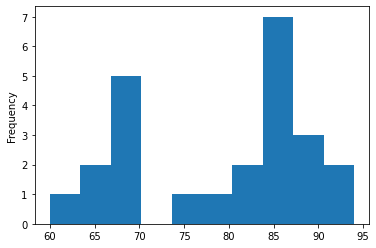

In [24]:
configure_plotly_browser_state()

clima.umid_min.plot.hist()

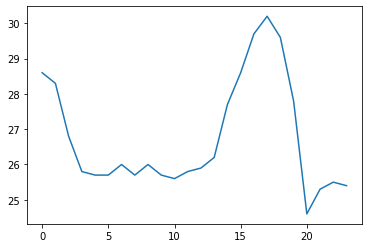

In [25]:
clima.temp_inst.plot.line()

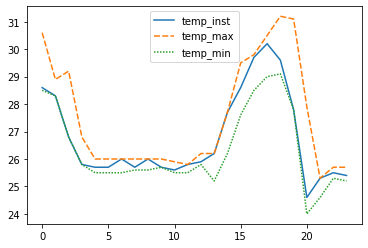

In [26]:
import seaborn as sns

sns.lineplot(data=[clima.temp_inst, clima.temp_max, clima.temp_min])

In [27]:

configure_plotly_browser_state() # Específico para o Colab

temp_min = go.Bar(x=clima.hora, y=clima.temp_min, name='Temperatura Mínima')
temp_max = go.Bar(x=clima.hora, y=clima.temp_max, name='Temperatura Máxima')
temperatura = go.Scatter(x=clima.hora, y=clima.temp_inst, mode='markers+lines', name='Temperatura')

data = [temp_min, temp_max, temperatura]

layout = go.Layout(
    title='Temperatura ao longo do dia',
    xaxis={'title': 'Hora do Dia'},
    yaxis={'title': 'Temperatura (ºC)'},
    barmode='stack'
)

fig = go.Figure(data=data, layout=layout)
fig.update_layout(title_x=0.5)

ply.iplot(fig)

fig.write_html('grafico.html')

In [40]:
colunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv('https://raw.githubusercontent.com/paulosalvatore/Ocean_CienciaDados_24_02_2021/main/dataset/iris.data', names=colunas)

In [41]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

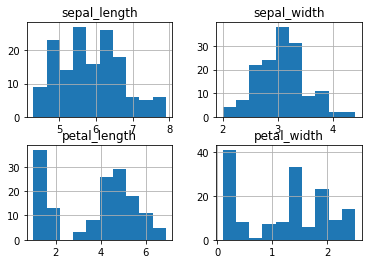

In [43]:
iris.hist();

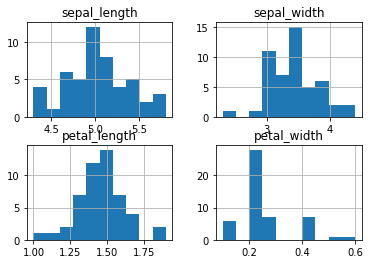

In [44]:
iris[iris['class'] == 'Iris-setosa'].hist();

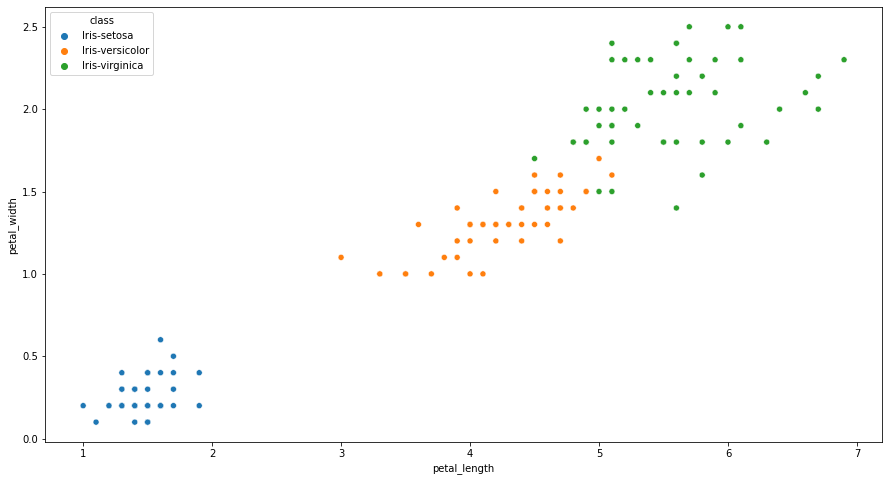

In [45]:
fig = plt.subplots(figsize=(15, 8))

sns.scatterplot(x='petal_length', y='petal_width', data=iris, hue='class');

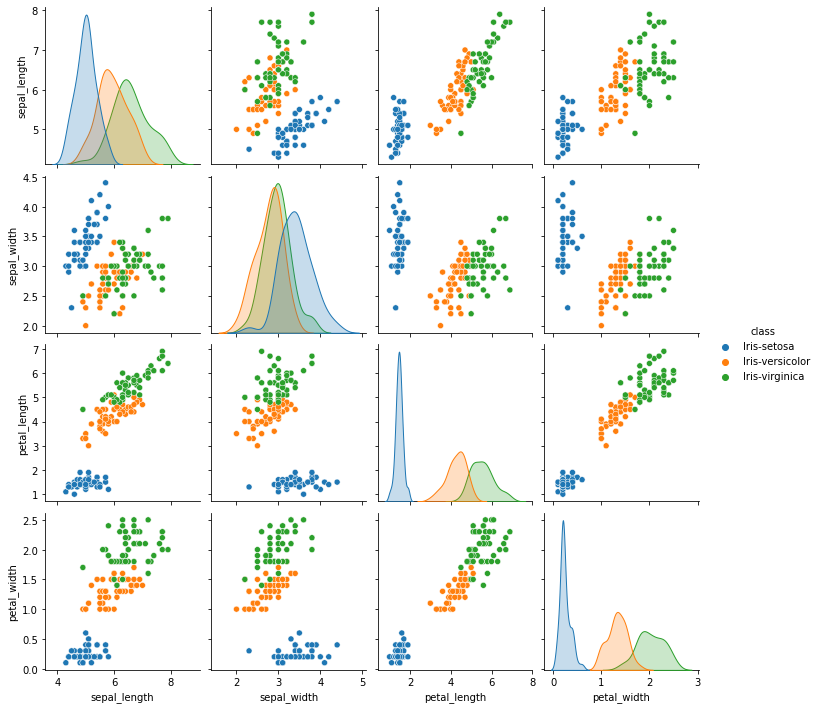

In [46]:
sns.pairplot(data=iris, hue='class');